![](https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/walkwithfastai.png?raw=true)

## About this course/study group:
* It's a hybrid
* Like Practical Deep Learning for Coders but many bonuses
* Spans 2-3 hours depending on who stays with 1-1.5 hour lectures

## About Me:
* Been doing fastai for 1.5 years
* A few projects (some involving fastai, some not)
* University undergraduate, Software Design and Development with a minor in ES

## Why did I make this?
* Make fastai accessable to Undergraduates at my school (University of West Florida)
* We both learn
* Techniques not mentioned in the course

# Course Schedule

**BLOCKS**:
* Block 1: Computer Vision
* Block 2: Tabular Neural Networks
* Block 3: Natural Language Processing

**Block 1** (January 15th - February 26th):
* **Lesson 1: PETs and Custom Datasets (a warm introduction to the DataBlock API)**
* Lesson 2: Image Classification Models from Scratch, Stochastic Gradient Descent
* Lesson 3: Multi-Label Classification, and Dealing with Unknown Labels
* Lesson 4: Image Segmentation, State-of-the-Art in Computer Vision
* Lesson 5: Style Transfer, `nbdev`, and Deployment
* Lesson 6: Keypoint Regression and Pose Detection
* Lesson 7: Image Generation and Object Detection
* Lesson 8: Audio

**Block 2** (March 4th - March 25th):
* Lesson 1: Pandas Workshop and Tabular Classification
* Lesson 2: Feature Engineering and Tabular Regression
* Lesson 3: Permutation Importance, Bayesian Optimization, Cross-Validation, and Labeled Test Sets
* Lesson 4: NODE, TabNet, DeepGBM

**BLOCK 3** (April 1st - April 22nd):
* Lesson 1: Introduction to NLP and the LSTM
* Lesson 2: Full Sentiment Classification, Tokenizers, and Ensembling
* Lesson 3: Other State-of-the-Art NLP Models
* Lesson 4: Multi-Lingual Data, DeViSe

Looks very intense, if you don't keep up it's okay. Lectures are recorded.

# Requirements:

* A Google account to use Google Colaboratory (what I am in right now)
* A Paperspace account for Natural Language Processing

# Communication
* Key to making study groups work!
* We have a dedicated mega-thread on the fastai forums [here](https://forums.fast.ai/t/a-walk-with-fastai-study-group-and-online-lectures-megathread/59929) for us to use!
* No question is too stupid!

# Enough intro, can I learn already?

# Environment setup

Google Colaboratory - Free GPU's

Go to [here](colab.research.google.com) to start using it.

File -> Open notebook

![](https://i.imgur.com/pGCkS9G.png)

Select from GitHub and use the following URL: muellerzr/A-walk-with-fastai

![](https://i.imgur.com/9O1LMZt.png)

Choose open in a new tab

![](https://i.imgur.com/NuL67k9.png)

And now your screen looks similar to below! (With what I am using instead)

![alt text](https://i.imgur.com/n4mQ2qj.png)

## Changing our processer to a GPU

* 'Runtime'
* 'Change runtime type'
* 'Runtime type' should be 'Python 3'
* 'Hardware accelerator' should be 'GPU' 

## Initial Run Warning (For pulling from GitHub)

***If you get a pop up saying 'Warning: This notebook was not authored by Google,' check 'Reset all runtimes before running' and click 'Run Anyway'***

![alt text](https://course.fast.ai/images/colab/02.png)

## Saving your work

For now this will just save the notebook on their cloud, we will look next week how to utilize your Google Drives!

![alt text](https://course.fast.ai/images/colab/09.png)

# What is fastai?

* Neural-network based library
* Helps make state-of-the-art more accessible
* Supports five datatypes:
  * Computer vision (fastai.vision)
  * Tabular data (fastai.tabular)
  * Text (fastai.text)
  * Collaborative filtering (fastai.collab) - **not going over**

# What is our goal today?

* Make an image classifier for Cats and Dogs
* Make our own image classifier
* Start to understand the DataBlock API

# Let's grab the library:

In [ ]:
#Run once per session
!pip install fastai -q --upgrade

Now we can import the `fastai` libraries (fastai 2.0!)

Today we will be using the `basics`, `callback`, and `vision` libraries as we have a **vision** task

In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

Overall process using machine learning models and fastai:
1. Make our `DataLoaders`
2. Make a `Learner` with some "equipment"
3. Train

## Looking at Data

We'll be trying to identify between 12 species of cats and 25 species of dogs (37 in total). Five years ago, the best was 59% with seperate classifications for the image, head, and body of the animal. Let's try just doing one image for everything.

But before anything, we need data!

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function tar_extract at 0x7faf97d5a158>)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [ ]:
untar_data??

Let's download the dataset

In [ ]:
path = untar_data(URLs.PETS)

And set our seed

In [ ]:
np.random.seed(2)

How will our data look?

In [ ]:
path.ls()[:3]

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

Let's build a `DataLoaders`. 

In [ ]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'

Some  basic transforms

In [ ]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

`ImageDataBunch` (renamed to ImageDataLoaders) - highest level API

In [ ]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

What is the API?

* See PPT

Let's rebuild using the `DataBlock` api - Medium Level

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [ ]:
path_im = path/'images'

In [ ]:
dls = pets.dataloaders(path_im, bs=bs)

We can take a look at a batch of our images using `show_batch` and pass in a aximum number of images to show, and how large we want to view them as

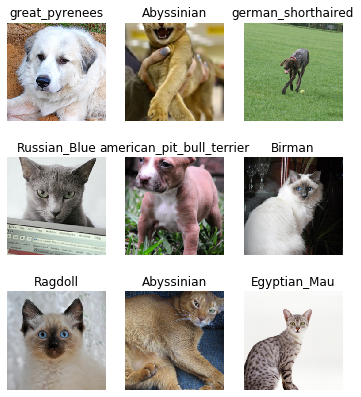

In [ ]:
dls.show_batch(max_n=9, figsize=(6,7))

If we want to see how many classes we have, and the names of them we can simply call `dls.vocab`. The first is the number of classes, the second is the names of our classes. You may notice this looks a bit odd, that's because this `L` is a new invention of Jeremy and Sylvian. Essentially it's a Python list taken to the extreme. 

Before if we wanted to grab the index for the name of a class (eg. our model output 0 as our class), we would need to use `data.c2i` to grab the Class2Index mapping. This is still here, it lives in `dls.vocab.o2i`

In [ ]:
dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [ ]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

## Time to make and train a model!

We will be using a convolutional neural network backbone and a fully connected head with a single hidden layer as our classifier. Don't worry if thats a bunch of nonsense for now. Right now, just know this: we are piggybacking off of a model to help us classify images into 37 categories.

First, we need to make our Neural Network and our `Learner` like before. 

A `Learner` needs (on a base level):

* `DataLoaders`
* Some architecture
* A evaluation metric
* A loss function
* An optimizer

We'll also use `mixed_precision` (`fp16`)

In [ ]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

Some assumptions being made here:

* Loss function is assumed as classification, so `CrossEntropyFlat`
* Optimizer is assumed to be Adam

Now, we can train it! We will train it for four cycles through all our data

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.919652,0.358465,0.114344,01:12
1,0.676084,0.240199,0.077808,01:11
2,0.378746,0.214091,0.068336,01:12
3,0.277557,0.208185,0.064953,01:12


In [ ]:
learn.save('stage_1')

## Lets look at our results

With the model trained, let's look at where our it might've messed up. What species did it have trouble differentiating between? So long as the misidentifications are not too crazy, our model is actually working.

Let's plot our losses and make a confusion matrix to visualize this. Below checks to make sure that all pieces we need are available

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

`plot_top_losses` needs `x` number of images to use, and a figure size.

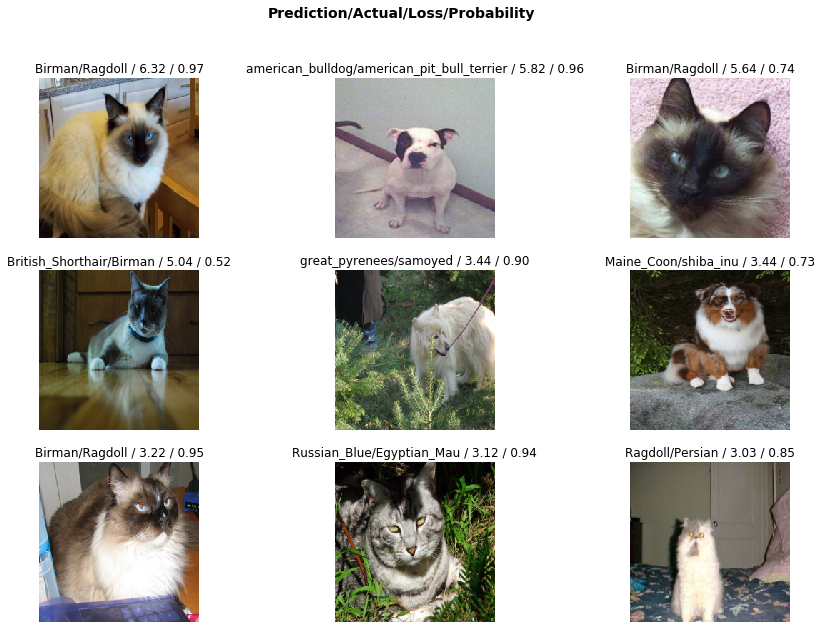

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

`plot_confusion_matrix` just needs a figure size. dpi adjusts the quality

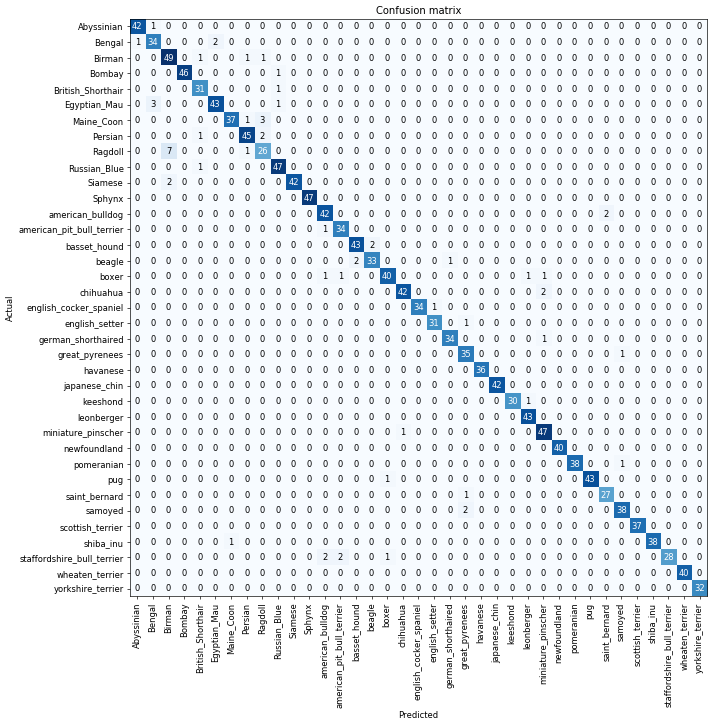

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

We can also directly grab our most confused (A raw version of the confusion matrix), and pass in a threshold

In [ ]:
interp.most_confused(min_val=3)

[('Ragdoll', 'Birman', 7),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Ragdoll', 3)]

## Unfreezing our data, fine-tuning, and our learning rates

So, we have the model. Let's fine tune it. First, we need to load our model back in.

In [ ]:
learn.load('stage_1');

Now we will *unfreeze* and train more

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.168013,4.194322,0.731394,01:16
1,1.062242,1.088786,0.305142,01:14
2,0.599455,0.481395,0.161705,01:14
3,0.290130,0.382984,0.117727,01:13


Now when we `unfreeze`, we unfreeze *all* the layers. So to show how a difference of a proper learning rate looks, let's load in those old weights and try using `lr_find()`

In [ ]:
learn.load('stage_1');

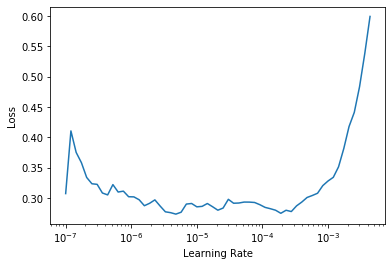

In [ ]:
learn.lr_find()

Alright so if we look here, we don't start really spiking our losses until ~10^-2 so a good spot is between 1e-6 and 1e-4, let's do that!

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.304765,0.138828,0.047361,01:14
1,0.262109,0.130033,0.043302,01:14
2,0.210819,0.133986,0.041949,01:14
3,0.196996,0.129849,0.040595,01:15


We can see that picking a proper learning rate can help speed things up!

In [ ]:
learn.save('stage_2')

## Now lets try with a resnet50!

If you need to restart your kernel due to memory errors I've attached the `dls` code below

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=32)

Go ahead and try running the below code yourself. You *should* see a higher increase in accuracy!

Steps to try: 

1. Create your Learner
2. Find a learning rate
3. Fit for 5 epochs
4. Unfreeze and fit for two more

In [ ]:
### Try here! ###

## The answer is hidden under here

In [ ]:
learn = cnn_learner(data, resnet50, pretrained=True, metrics=error_rate)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=slice(3e-4, 3e-3))

In [ ]:
learn.save('resnet50')

In [ ]:
learn.load('resnet50')
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=4e-4)

In [ ]:
learn.save('resnet50')